2. Read the Dataset

In [2]:
import pandas as pd

data = pd.read_csv("C:/Users/srina/Documents/Machine learning/fall23-age-prediction-from-images/wiki_labels.csv", usecols=['full_path', 'age'])

print(data.head())


                             full_path        age
0  ['17/10000217_1981-05-05_2009.png']  27.746119
1    ['12/100012_1948-07-03_2008.png']  59.582192
2  ['65/10001965_1930-05-23_1961.png']  30.696804
3  ['16/10002116_1971-05-31_2012.png']  40.672146
4  ['02/10002702_1960-11-09_2012.png']  51.224201


2.1 Shuffle the dataset randomly 

In [3]:
shuffled_df = data.sample(frac=1).reset_index(drop=True)
shuffled_df

,full_path,age
0,['19/24281619_1985-09-26_2007.png'],21.349772
1,['03/2322403_1914-08-01_1990.png'],75.505479
2,['15/28883915_1980-07-02_1980.png'],0.000000
3,['80/4076380_1976-04-16_2010.png'],33.793836
4,['85/8442785_1985-06-19_2012.png'],26.621689
...,...,...
60322,['47/19946847_1972-11-14_2013.png'],40.213242
60323,['16/33846416_1989-08-24_2013.png'],23.444064
60324,['71/10177771_1989-05-25_2010.png'],20.688584
60325,['69/32092269_1979-10-27_2001.png'],21.269178


3. Compute principal components

In [4]:
shuffled_df['full_path'] = shuffled_df['full_path'].str.replace("^\['|'\]$","")
shuffled_df

C:\Users\srina\AppData\Local\Temp\ipykernel_15652\3171151230.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  shuffled_df['full_path'] = shuffled_df['full_path'].str.replace("^\['|'\]$","")


,full_path,age
0,19/24281619_1985-09-26_2007.png,21.349772
1,03/2322403_1914-08-01_1990.png,75.505479
2,15/28883915_1980-07-02_1980.png,0.000000
3,80/4076380_1976-04-16_2010.png,33.793836
4,85/8442785_1985-06-19_2012.png,26.621689
...,...,...
60322,47/19946847_1972-11-14_2013.png,40.213242
60323,16/33846416_1989-08-24_2013.png,23.444064
60324,71/10177771_1989-05-25_2010.png,20.688584
60325,69/32092269_1979-10-27_2001.png,21.269178


In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(shuffled_df, train_size=0.8, random_state=0)


In [6]:
from PIL import Image
import numpy as np

im = Image.open('C:/Users/srina/Documents/Machine learning/fall23-age-prediction-from-images/wiki_labeled/wiki_labeled/'+ train_data['full_path'].iloc[0])

H,W = np.shape(im)


In [7]:
import pandas as pd
import os

def load_images(placeholder, file_paths, image_folder):
    i = 0
    for file_path in file_paths:
        full_path = os.path.join(image_folder, file_path)
        with Image.open(full_path) as img:
            placeholder[i,:] = np.reshape(np.asarray(img),[1,H*W])
            i = i + 1
            

In [8]:
x = len(train_data)
y = len(test_data)

train_m =  np.zeros([x,H*W])
test_m =  np.zeros([y,H*W])
image_folder = "C:/Users/srina/Documents/Machine learning/fall23-age-prediction-from-images/wiki_labeled/wiki_labeled"

In [9]:
load_images(train_m, train_data['full_path'], image_folder)


In [10]:
load_images(test_m, test_data['full_path'], image_folder)


In [11]:
train_mean = np.mean(train_m, axis=0)
test_mean = np.mean(test_m, axis=0)


In [12]:
A = train_m-train_mean


In [13]:
cov_matrix =(np.dot(A.T,A))/(train_data.shape[0]-1)


In [14]:
from numpy import linalg as LA

w, v = LA.eig(cov_matrix)


In [15]:
index = np.argsort(w)[::-1]
sorted_eignValues = w[index]
sorted_eignVectors = v[:,index]

4. Screeplot

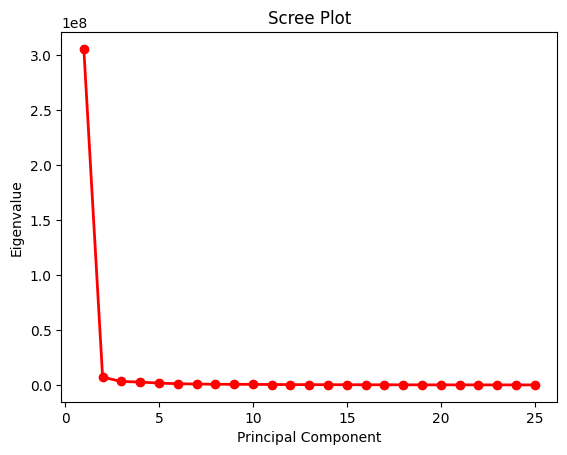

In [16]:
import matplotlib.pyplot as plt
string_vals = np.arange(25)+1

plt.plot(string_vals, sorted_eignValues[:25], 'ro-', linewidth=2)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.show()

5. 20 egion faces

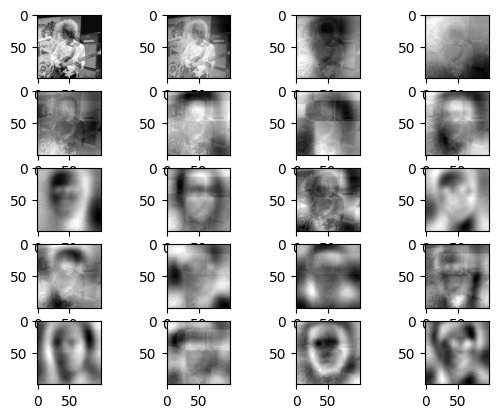

In [17]:
from matplotlib.pyplot import imshow

for i in range(20):
    plt.subplot(5,4,i+1)
    imshow(sorted_eignVectors[:,i].reshape(100,100),cmap='gray')

6. Choose k value and rediuced dimensionality 

In [18]:
k = 15
X_train_pca=np.dot(train_m,sorted_eignVectors[:,:k])
X_test_pca=np.dot(test_m,sorted_eignVectors[:,:k])

In [19]:
# def stocastic_gradient_descent(X, y, betas, num_epochs, learning_rate):
#     num_samples = train_data.shape[0]
#     costs = np.zeros(num_samples)
    
#     for epoch in range(num_epochs):
#         for sample in range(num_samples):
#             predictions = np.dot(X, np.transpose(betas))
#             error = predictions[sample] - y[sample]
#             gradient = learning_rate * error * X[sample, :]
            
#             betas = betas - gradient
            
#             costs[sample] = np.sum(np.power((predictions - y), 2)) / (2 * len(X))
    
#     return betas, costs



from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_image_train_data= scaler.fit_transform(X_train_pca)
std_image_test_data = scaler.transform(X_test_pca)

print(std_image_train_data.shape)
print(std_image_test_data.shape)

(48261, 15)
(12066, 15)


In [20]:

y_train = train_data['age'].to_numpy().reshape(-1, 1)
y_test = test_data['age']


7. SGD

In [21]:







from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


sgd_r = SGDRegressor(loss="epsilon_insensitive", learning_rate='constant', eta0=0.0001, random_state=12321, max_iter=100)

sgd_r.fit(std_image_train_data, y_train)

predicted_ages = sgd_r.predict(std_image_test_data)


c:\Users\srina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8. Calculated the RMSE for different values of lernaing rate and iterations.

In [22]:
def sgd_model(learning_rate, X_train, y_train, X_test, y_test, n_epochs):
    sgd_r = SGDRegressor(learning_rate='constant', eta0=learning_rate, random_state=12321, max_iter=n_epochs)
    sgd_r.fit(X_train, y_train)
    predicted_ages = sgd_r.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predicted_ages))
    return rmse


c:\Users\srina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\srina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\srina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\srina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataC

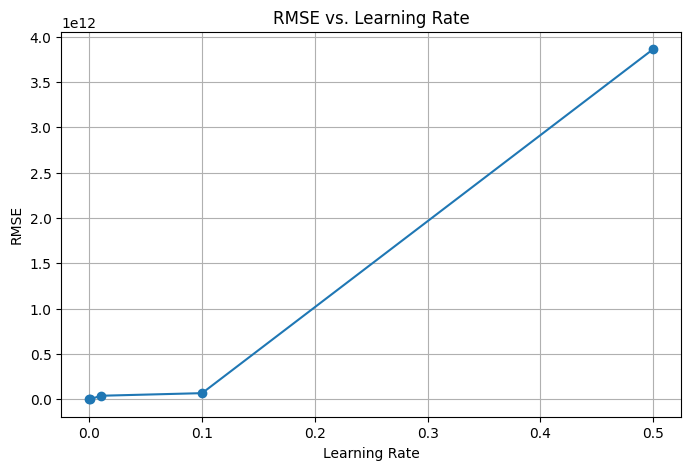

In [23]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5]

results_lr = []
for lr in learning_rates:
    rmse = sgd_model(lr, std_image_train_data, y_train, std_image_test_data, y_test, 1000)
    results_lr.append(rmse)


plt.figure(figsize=(8, 5))
plt.plot(learning_rates, results_lr, marker='o', linestyle='-')
plt.title('RMSE vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

c:\Users\srina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\srina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\srina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\srina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataC

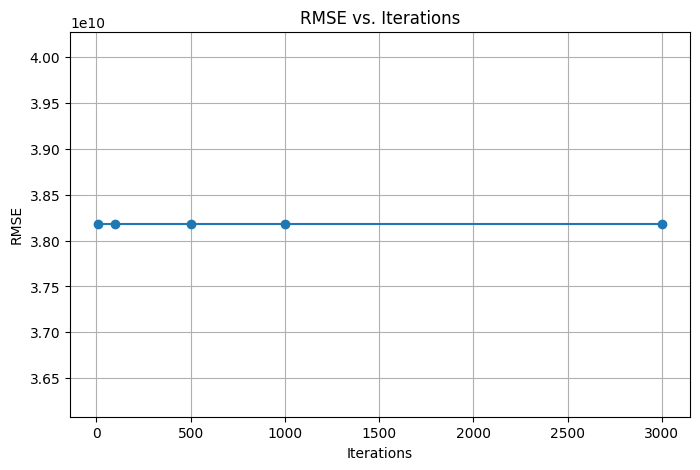

In [24]:
nepoch = [10, 100, 500, 1000, 3000]

results_e = []
for n in nepoch:
    rmse = sgd_model(0.01, std_image_train_data, y_train, std_image_test_data, y_test, n)
    results_e.append(rmse)


plt.figure(figsize=(8, 5))
plt.plot(nepoch, results_e, marker='o', linestyle='-')
plt.title('RMSE vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

9. Calculate RMSE on the test data.

In [25]:
from sklearn.metrics import mean_squared_error

predicted_ages = sgd_r.predict(std_image_test_data)

rmse = np.sqrt(mean_squared_error(y_test, predicted_ages))

print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 20.445877879279895


In [26]:
j_data = pd.read_csv("C:/Users/srina/Documents/Machine learning/fall23-age-prediction-from-images/wiki_judge.csv", usecols=['ID','full_path'])

print(j_data.head())

   ID  full_path
0   1  ['1.png']
1   3  ['3.png']
2   4  ['4.png']
3   5  ['5.png']
4   6  ['6.png']


In [27]:
j_data['full_path'] = j_data['full_path'].str.replace("^\['|'\]$","")

C:\Users\srina\AppData\Local\Temp\ipykernel_15652\2964584111.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  j_data['full_path'] = j_data['full_path'].str.replace("^\['|'\]$","")


In [28]:
j_data

,ID,full_path
0,1,1.png
1,3,3.png
2,4,4.png
3,5,5.png
4,6,6.png
...,...,...
1404,1995,1995.png
1405,1997,1997.png
1406,1998,1998.png
1407,1999,1999.png


In [29]:
m = len(j_data)

train_j =  np.zeros([m,H*W])

image_folder = "C:/Users/srina/Documents/Machine learning/fall23-age-prediction-from-images/wiki_judge_images/wiki_judge_images/"

In [30]:
load_images(train_j, j_data['full_path'], image_folder)

In [31]:
train_j.shape

(1409, 10000)

In [32]:
X_judge=np.dot(train_j,sorted_eignVectors[:,0:k])


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_image_j = scaler.fit_transform(X_judge)

std_image_j.shape

(1409, 15)

In [34]:
ages_judge = sgd_r.predict(std_image_j)

ages_judge

array([36.96403525, 24.14885259, 29.68712233, ..., 18.98715439,
       40.85522134, 35.01573343])

In [35]:
i=np.arange(1,len(ages_judge)+1)

In [36]:
predDataFrame = j_data[['ID']]
predDataFrame['age'] = ages_judge
predDataFrame.to_csv("Submission1.csv", sep=',',index=False)

10. calculate the mean and standard deviation for the RMSE obtained 

In [1]:
rmse = results_lr

print(rmse)



print('Average of RMSE : ',np.mean(np.array(rmse)))
print('Standard Deviation of RMSE : ',np.std(np.array(rmse)))

NameError: name 'results_lr' is not defined